
Total number of glucose readings is: 8057

Some of points may be missing, the above number represents the collected readings from start to end date

Remove NaN from the mg/dL column... 
Total actual number of glucose readings is: 7915

Remove NaN from the CHO so we can plot the points of meals...
Total number of meal times: 325

Some of the successive meal readings stand for one meal only with many servings

Add succesive meal readings (CHO, fat, protein) and store under one recording...

There are 109 recorded meal times.

                 Date  mg/dL  CHO (g)  Fat (g)  Protein (g)
0 2008-08-04 19:07:00   96.0  120.777  23.7115       59.798
1 2008-08-05 07:02:00  112.0   28.209   7.0635        6.562
2 2008-08-05 12:02:00   90.0   30.380   9.2195       32.022
3 2008-08-05 16:47:00   84.0   14.310   0.3800        1.370
4 2008-08-05 19:52:00  105.0   89.430  24.7800       37.490


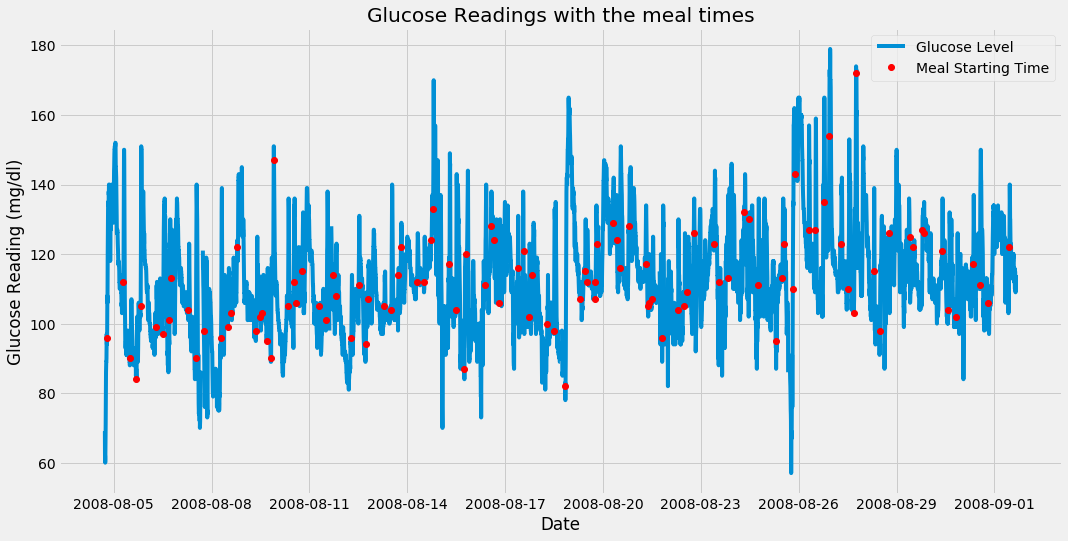

In [282]:
#This was written in Python 2, if you are running Python 3, use a code translation library

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

#This is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

#My mac directory path
_DATA_DIR = r'/Users/schem001/Desktop/Diabetes Project/Diabetic-Project/input'
_FIG_DIR = r'/Users/schem001/Desktop/Diabetes Project/Diabetic-Project/figures'



#My win directory path
# _DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
# _FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P4.csv')
fields = ["Date", "mg/dL", "CHO (g)", "Fat (g)", "Protein (g)"]
df_P = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df_P = df_P.sort_values(['Date'])

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

#For printing full elements of dataframe or array
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

#Print some information about the data    
print "\nTotal number of glucose readings is:", df_P['mg/dL'].size
print "\nSome of points may be missing, the above number represents the collected readings from start to end date"

#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_P_wonan_mg = df_P.dropna(subset=['mg/dL'])
print "\nRemove NaN from the mg/dL column...", "\nTotal actual number of glucose readings is:", df_P_wonan_mg['mg/dL'].size

#Converting object type to float for all of the dataframe (df_Pv2 stands for dataframe, patient, version 2)
df_Pv2= pd.DataFrame(df_P_wonan_mg).convert_objects(convert_numeric=True)

print "\nRemove NaN from the CHO so we can plot the points of meals..."
df_Pv2 = df_Pv2.dropna(subset=['CHO (g)'])
print "Total number of meal times:", df_Pv2['CHO (g)'].size

print "\nSome of the successive meal readings stand for one meal only with many servings"

df_Pv2 = df_Pv2.reset_index(drop=True)

df_P_meals = copy.deepcopy(df_Pv2)

print '\nAdd succesive meal readings (CHO, fat, protein) and store under one recording...\n' 
row = 0

#Combine the successive meals: if the minute difference is 5 minutes then combine

i = 0   
while (i < (df_Pv2['CHO (g)'].size-1)):

    k = i
    #print "Meal time is:", df_Pv2.Date[i]
        
    row = row + 1         
    
    minutesdiff = df_Pv2.Date[k+1] - df_Pv2.Date[k]
    #If the meals are within 30 minutes of each other, combine into one
    while ((minutesdiff.seconds / 60 <= 30)):
        #drop this row but add CHO and fats and proteins to values of previous row
        #print "add"
        k = k+1
        df_P_meals.set_value(row-1,'CHO (g)',df_P_meals['CHO (g)'][row-1]+df_P_meals['CHO (g)'][row])
        df_P_meals.set_value(row-1,'Fat (g)',df_P_meals['Fat (g)'][row-1]+df_P_meals['Fat (g)'][row])
        df_P_meals.set_value(row-1,'Protein (g)',df_P_meals['Protein (g)'][row-1]+df_P_meals['Protein (g)'][row])
        df_P_meals.drop(df_P_meals.index[row], axis=0, inplace=True)
        df_P_meals = df_P_meals.reset_index(drop=True)
        if (k == (df_Pv2['CHO (g)'].size-1)):
            break   
        minutesdiff = df_Pv2.Date[k+1] - df_Pv2.Date[k]
    i = k+1               

#print_full(df_P_meals)

df_P_meals = df_P_meals.reset_index(drop=True)
print "There are", df_P_meals['CHO (g)'].size, "recorded meal times.\n" 

#or simply print head of dataframe only
print df_P_meals.head()

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df_P.Date, df_P['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df_P_meals.Date, df_P_meals['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);

#Last non empty row of patient data
nonempty_P_readings = df_P[pd.notnull(df_P['Date'])]
nonempty_readings = df_P[pd.notnull(df_P['Date'])]
last_row_date = nonempty_readings.iloc[-1, nonempty_readings.columns.get_loc('Date')]

In [283]:
#This cell output an interactive plot, where we can zoom in and out and select a specific area

# output to static HTML file
output_file("Raw_CGM.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P.Date, df_P['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P.Date, df_P['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="grey")

good_readings = ColumnDataSource(dict(x=df_P_meals.Date, y=df_P_meals['mg/dL'], z=df_P_meals['CHO (g)'], k = df_P_meals['Fat (g)'], d = df_P_meals['Protein (g)']))

g1 = plot.asterisk(x=df_P_meals.Date, y=df_P_meals['mg/dL'], legend = 'Meal Recordings', line_color="#f0027f", fill_color=None, line_width=8, source=good_readings)

plot.add_tools(HoverTool( renderers = [g1],  tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

show(plot) 

# Current patient meal size histogram & Stats

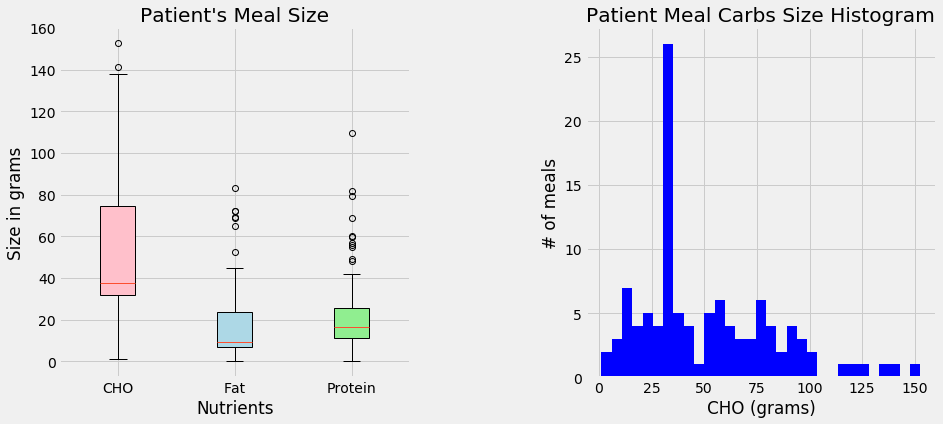

For this patient, the meal Carbs mean is: 50.75 grams with a std of: 32.16 grams.


In [284]:
bins =  int(math.ceil(np.max(df_P_meals['CHO (g)'])/5))#bins of 5 grams

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
######################Box Plot
# rectangular box plot
bplot1 = axes[0].boxplot([df_P_meals['CHO (g)'],df_P_meals['Fat (g)'], df_P_meals['Protein (g)']],
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# add x-tick labels
plt.setp(axes[0], xticks=[y+1 for y in range(3)],
         xticklabels=['CHO', 'Fat', 'Protein'])

axes[0].set_xlabel('Nutrients')
axes[0].set_ylabel('Size in grams')
axes[0].set_title('Patient\'s Meal Size')

#####################Histogram of CHO
bplot0 = axes[1].hist(df_P_meals['CHO (g)'], bins, facecolor='blue', alpha=1)
axes[1].set_xlabel('CHO (grams)')
axes[1].set_ylabel('# of meals')
axes[1].set_title('Patient Meal Carbs Size Histogram')
fig.subplots_adjust(wspace=0.5)

plt.show()

#n, bins, patches = plt.hist(df_P_meals['CHO (g)'], bins, facecolor='blue', alpha=1)

print "For this patient, the meal Carbs mean is:", round(np.mean(df_P_meals['CHO (g)']),2), "grams with a std of:",round(np.std(df_P_meals['CHO (g)']),2), "grams."

# Critical Assumptions for Cleaning Data

## 1. Assumption for Deletion

**a. Delete meal times that have several missing glucose readings and do not have a full glucose plot following them**

We may consider keeping these points later if we are interested on the meal times only and not the postprandial signals following them.

The selected window is under window_size_minutes. i.e: 23 represents a window of (23*5)+5 = 120 mintues

In [285]:
#This chunk of code implements the first condition, which removes the meals that have significant missing successive points
import datetime

df_P_meals_w_deletion = copy.deepcopy(df_P_meals)

#variables
incr = 5 #Data was recorded at 5 minutes increments
#window_size = 23 #This represents window size based on increments of 5.

window_size_minutes = 180# in minutes
window_size = (window_size_minutes / 5) - 1

del_points_df_a = pd.DataFrame()#Dataframe containing meal to be deleted by this assumption
points_to_del_a = []

for x in range(df_P_meals_w_deletion['CHO (g)'].size):
    a = df_P_meals_w_deletion['Date'][x]
    b = a
    count = 0
    for j in range(window_size):
        b += datetime.timedelta(minutes=incr)
        reading = df_P.loc[df_P['Date'] == b]['mg/dL']
        try:
            reading.values[0]
        except IndexError:
            #print "Index out of range"
            count +=1 
            continue  
        if (math.isnan(reading.values[0])):
            count +=1
    #If third of the window has missing values, exclude that meal
    if (count > ((window_size+1)/4)):
        print "\nThe meal time at", a, "has", count,"missing readings within its {}".format((window_size+1)*5),"minutes. Thus, it will be removed from the dataset.\n"
        #Put this into a dataframe to plot later with different color
        del_points_df_a = del_points_df_a.append(df_P.loc[df_P['Date'] == a])        
        points_to_del_a.extend([x])  

#Remove the above detected points from dataset
df_P_meals_w_deletion.drop(df_P_meals_w_deletion.index[points_to_del_a],axis=0,inplace=True)
df_P_meals_w_deletion = df_P_meals_w_deletion.sort_values(['Date'])
df_P_meals_w_deletion = df_P_meals_w_deletion.reset_index(drop=True)

if (df_P_meals_w_deletion['CHO (g)'].size == df_P_meals['CHO (g)'].size):
    print "There are no meals that need to be excluded, at this stage.\n"

print "There are", df_P_meals_w_deletion['CHO (g)'].size, "remaining meal times recordings.\n" 

#print points_to_del_a

#print_full(df_P_meals_w_deletion)

There are no meals that need to be excluded, at this stage.

There are 109 remaining meal times recordings.



**b. Delete meal times which all following readings are decreasing or have no sign of a significant increase (i.e: 15mg/dl).**

For every glucose reading, we check if there is a significant increase in **its** following "glucose_effect_window" (i.e 45 minutes). 

We start few minutes before the meal was recorded, just in case the meal was recorded few minutes after food intake.

For instance, a reading situated 30 minutes after meal time recording which has a following glucose increase of (15mg/dl in total) after 30minutes will result on keeping that original meal time which was (30mins + 30mins before). Hence, this is a loose assumption but we can make it stricter by changing window variables and increase glucose value.

If no significant increase is apparent, we delete the meal point.

In [286]:
#This chunk of code implements the second constraint, removing meals which do not have a significant postprandial glucose increase
df_P_meals_w_deletion_b = copy.deepcopy(df_P_meals_w_deletion)

#variables
incr = 5 #Data was collected at 5 minutes increments- Do not change this
glucose_effect_window = 45 #Minutes food may take to be reflected on the blood glucose
gl_increase_window = 45 #Minutes from the instance where the glucose is reflected on the blood to significant increase###Change this to higher minutes if glucose increases slowly
pre_recording_mins = 0 #Minutes that may have elapsed before patient has recorded the reading
gl_increase = 15 #15mg/dL increase because we are interested in meals for now, later we can include sncaks

########May want to change VARIABLES above for different patients, especially if food takes a while to affect their glucose level############

meal_affect_window = [i for i in np.arange(-(pre_recording_mins), glucose_effect_window+incr, incr)]

compare_window = [j for j in np.arange(incr, gl_increase_window+incr, incr)]

points_to_del_b = []
del_points_df_b = pd.DataFrame()#Dataframe containing meal to be deleted by this assumption
low_surrounding_gl = pd.DataFrame()#Dataframe containing points where the glucose will go to take a significant increase, not necessarily the very lowest points
high_surrounding_gl = pd.DataFrame()
offset_low_point_to_meal = []

for x, item in enumerate(df_P_meals_w_deletion_b['Date']):
    
    a = df_P_meals_w_deletion_b['Date'][x]
    meal_reading = df_P.loc[df_P['Date'] == item]['mg/dL']
    b = item - datetime.timedelta(minutes=pre_recording_mins) 
    keep = 0
    
    for i in meal_affect_window:
        current_reading = df_P.loc[df_P['Date'] == b]['mg/dL']
        try:
            current_reading.values[0]
        except IndexError:
            #print "Index out of range"
            b += datetime.timedelta(minutes=incr)   
            continue            
        if (math.isnan(current_reading.values[0])):
            b += datetime.timedelta(minutes=incr)  
            continue      
            
        c = b
        for k in compare_window:#comparing the point with its following readings in compare window size
            c += datetime.timedelta(minutes=incr)
            compare_reading = df_P.loc[df_P['Date'] == c]['mg/dL']
            if ((compare_reading.values[0] - current_reading.values[0]) >=gl_increase):
                #print "We should keep this reading"
                #Store this reading on a dataframe of low readings surrounding meals
                low_surrounding_gl = low_surrounding_gl.append(df_P.loc[df_P['Date'] == b])
                high_surrounding_gl = high_surrounding_gl.append(df_P.loc[df_P['Date'] == c])
                #print "a is:", a, "and b is:", b, "and c is:", c, "and difference between b and c is:", (c - b)
                if (b<item):
                    offset_low_point_to_meal.extend([int(-(item-b).seconds / 60)])
                    #print "The time elapsed between original meal time and surrounding low point is:", "-", (a-b).seconds / 60 ,"minutes."        
                else:
                    offset_low_point_to_meal.extend([int((b-item).seconds / 60)])
                    #print "The time elapsed between original meal time and surrounding low point is:", "+", (b-a).seconds / 60 ,"minutes."  
                #offset_low_point_to_meal.extend([offset_seconds])
                keep = 1  
                break
                
        if (keep == 1):
            break
        b += datetime.timedelta(minutes=incr)    
        
        if (i == meal_affect_window[-1]):
            #print "The meal reading taken at" ,a, "should be deleted."
            
            #print "The reading that is about to be removed has the following size, CHO", round(df_P_meals_w_deletion_b['CHO (g)'][x],2),"g, Proteins", round(df_P_meals_w_deletion_b['Protein (g)'][x],2),"g, Fats", round(df_P_meals_w_deletion_b['Fat (g)'][x],2),"g"
            #Put this into an dataframe to plot with different color
            del_points_df_b = del_points_df_b.append(df_P.loc[df_P['Date'] == item])
            #Also remove this from dataset   
            points_to_del_b.extend([x]) 

#Switch to this part of the code            
#######Add this portion of the code, if we wan to keep all meals that are above a certain treshold 
#             #if th emeal size is larger than certain value, keep regardless. For instance, cho > 20grams, or proteins > 10grams, or fats > 10 grams        
#             if(df_P_meals_w_deletion_b['CHO (g)'][x]>20 or df_P_meals_w_deletion_b['Protein (g)'][x]>10 or df_P_meals_w_deletion_b['Fat (g)'][x]>10):
#                 break
#             else:
#                 #Put this into an dataframe to plot with different color
#                 del_points_df_b = del_points_df_b.append(df_P.loc[df_P['Date'] == item])
#                 #Also remove this from dataset   
#                 points_to_del_b.extend([x])      
#############################################################

#print "\nThe dataframe of the points to be deleted is:\n", del_points_df 
#print (points_to_del)

print "\nThere are", len(points_to_del_b), "meal recordings that will be deleted."

df_P_meals_w_deletion_b.drop(df_P_meals_w_deletion_b.index[points_to_del_b],axis=0,inplace=True)
df_P_meals_w_deletion_b = df_P_meals_w_deletion_b.sort_values(['Date'])
df_P_meals_w_deletion_b = df_P_meals_w_deletion_b.reset_index(drop=True)

print "\nThere are", df_P_meals_w_deletion_b['CHO (g)'].size, "remaining meal times recordings." 

low_surrounding_gl = low_surrounding_gl.sort_values(['Date'])
low_surrounding_gl = low_surrounding_gl.reset_index(drop=True)

high_surrounding_gl = high_surrounding_gl.sort_values(['Date'])
high_surrounding_gl = high_surrounding_gl.reset_index(drop=True)

df_P_meals_w_deletion_v2 = copy.deepcopy(df_P_meals_w_deletion_b)


There are 34 meal recordings that will be deleted.

There are 75 remaining meal times recordings.


In [287]:
# output to static HTML file, remaining meals, meals to be deleted after assumption a and b
output_file("All_Data_with_Deletion.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P.Date, df_P['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P.Date, df_P['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="grey")

good_readings = ColumnDataSource(dict(x=df_P_meals_w_deletion_v2.Date, y=df_P_meals_w_deletion_v2['mg/dL'], z=df_P_meals_w_deletion_v2['CHO (g)'], k = df_P_meals_w_deletion_v2['Fat (g)'], d = df_P_meals_w_deletion_v2['Protein (g)']))
g1 = plot.asterisk(x=df_P_meals_w_deletion_v2.Date, y=df_P_meals_w_deletion_v2['mg/dL'], legend = 'Meal Recordings', line_color="#f0027f", fill_color=None, line_width=8, source=good_readings)

if (len(points_to_del_a) != 0):
    plot.asterisk(x=del_points_df_a.Date, y=del_points_df_a['mg/dL'],legend = 'Meal to be deleted after condition a', line_color="#32CD32", fill_color=None, line_width=8)

if (len(points_to_del_b) != 0):    
    plot.asterisk(x=del_points_df_b.Date, y=del_points_df_b['mg/dL'],legend = 'Meal to be deleted after condition b', line_color="#0404B4", fill_color=None, line_width=8)

#plot.asterisk(x=high_surrounding_gl.Date, y=high_surrounding_gl['mg/dL'], legend = 'first increase Points', line_color="#32CD32", fill_color=None, line_width=8)   
#plot.asterisk(x=low_surrounding_gl.Date, y=low_surrounding_gl['mg/dL'], legend = 'first low Points', line_color="#0404B4", fill_color=None, line_width=8)   

#print y
plot.add_tools(HoverTool( renderers = [g1],  tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

show(plot) 


** Aggregate all reamaining meals into one day.**

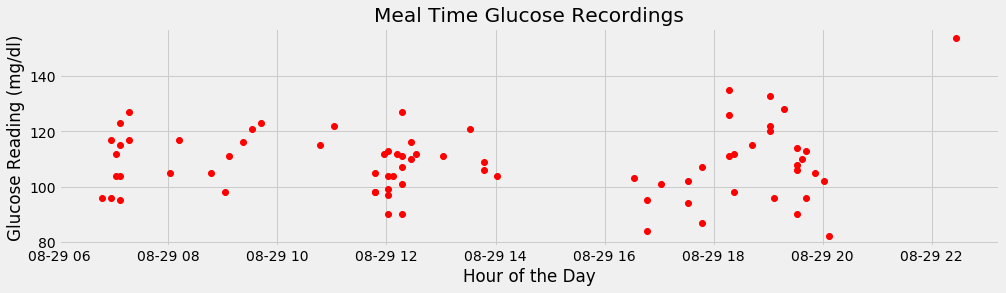

In [288]:
df_P_all_clean_1day = copy.deepcopy(df_P_meals_w_deletion_v2)

d = datetime.datetime.today()
for i in range(len(df_P_all_clean_1day)):
    dt = df_P_all_clean_1day.Date[i].replace(year=d.year, month=d.month, day=d.day)    
    df_P_all_clean_1day.Date[i] = dt

fig = plt.figure(figsize= (15,15))
plt.subplots_adjust(hspace=0.5)

sub1 = fig.add_subplot(311)
sub1.set_xlabel('Hour of the Day')
sub1.set_ylabel('Glucose Reading (mg/dl)')
sub1.set_title('Meal Time Glucose Recordings')
plt.plot_date(df_P_all_clean_1day.Date, df_P_all_clean_1day['mg/dL'], 'ro')  

plt.show()

**This completes the assumptions for deleting abnormal meal points**

**The dataframe that contains the meal times after deletion of abnormal meal recordings is: df_P_meals_w_deletion_v2**

# Detecting peaks following meal times

Steps:

1. Detect a significant glucose drop

2. Find the highest glucose point up to that drop point


In [289]:
#Step 1

gl_decrease = 12 #15mg/dl of glucose drop (we noticed from the data that 10mg/dl would be too low and may result in not finding the highest peak after meal)

minutes2peak = 90#Minutes to reach the peak after meal
gl_decrease_window = 90 #Minutes it takes for a significant glucose decrease after meal, it may take long time for glucose to go down, few hours

up2peak_window = [j for j in np.arange(0, minutes2peak+incr, incr)]
compare_window = [j for j in np.arange(incr, gl_decrease_window+incr, incr)]

#print up2peak_window

afterpeak_lowgl_df = pd.DataFrame()#This dataframe contains the points after the glucose drop following the peak
lowpoint_to_del_df = pd.DataFrame()#Dataframe contaning any meal recording to be deleted because they do not have a significant nearby glucose drop after the increase
peak_points_df = pd.DataFrame()#Dataframe containing peak points following meal times
lowpoint_to_del = []

for x, item in enumerate(high_surrounding_gl['mg/dL']):   
    a = high_surrounding_gl['Date'][x]   
    keep = 0
    b= a

    for i in up2peak_window:

        current_reading = df_P.loc[df_P['Date'] == b]['mg/dL']
        #print "**Following reading:", current_reading.values[0], "at the date of", b          
        c = b
        for k in compare_window:#comparing the point with its following readings in compare window size
            c += datetime.timedelta(minutes=incr)
            compare_reading = df_P.loc[df_P['Date'] == c]['mg/dL']
            #print "***Compared reading reading:", compare_reading.values[0], " at the date of", c  
            if ((current_reading.values[0] - compare_reading.values[0]) > gl_decrease):#significant glucose drop has been detected
                #Store this reading on a dataframe of points detecting glucose drop after peak
                #print "found it"
                afterpeak_lowgl_df = afterpeak_lowgl_df.append(df_P.loc[df_P['Date'] == c])
                keep = 1
                break
                
        if (keep == 1):
            break   
    
        if (i == up2peak_window[-1]):
            #print "Could not detect a significant glucose drop after this meal recording", df_P_meals_w_deletion_v2['Date'][x], ". It is suggested to delete it"  
            lowpoint_to_del.extend([x])  
            lowpoint_to_del_df = lowpoint_to_del_df.append(df_P.loc[df_P['Date'] == a])
            
        b += datetime.timedelta(minutes=incr)    

afterpeak_lowgl_df = afterpeak_lowgl_df.reset_index(drop=True)
lowpoint_to_del_df = lowpoint_to_del_df.reset_index(drop=True)

print "Could not detect a significant glucose drop after the following meal recordings:\n",lowpoint_to_del_df['Date']
#Drop x from the "all the meals" dataframe 
df_P_meals_w_deletion_v2.drop(df_P_meals_w_deletion_v2.index[lowpoint_to_del],axis=0,inplace=True)  
df_P_meals_w_deletion_v2 = df_P_meals_w_deletion_v2.reset_index(drop=True)

#print "number of meals are:", df_P1_meals_w_deletion['CHO (g)'].size

#print "afterpeak_lowgl_df size is:", afterpeak_lowgl_df['CHO (g)'].size

#Step 2

#print "\nThe dataframe of the points after detecting a glucose drop:\n", afterpeak_lowgl_df 
def drange(start, stop, step):
    while start <= stop:
            yield start
            start += step
            
#print df_P1.iloc[-2]['Date']
    
for x, item in enumerate(afterpeak_lowgl_df['mg/dL']):
    #print "At the meal of date", df_P1_meals_w_deletion['Date'][x], "the lowest point is at:", surrounding_lowest_points_df['Date'][x] , "and low after peak is at:", afterpeak_lowgl_df['Date'][x]  
    a = df_P_meals_w_deletion_v2['Date'][x]
    #print "x is:", x , "and its date is:", afterpeak_lowgl_df['Date'][x]   
    current_reading = df_P.loc[df_P['Date'] == a]['mg/dL'].values[0]
    lowpt_after_peak = afterpeak_lowgl_df['Date'][x]   
    b= a
    #difference in minutes between lowest point and the point after glucose drop following peak
    window_peak = (lowpt_after_peak-a).seconds / 60
    #print window_peak
    peak_index = 0

    for i in drange(5,window_peak,5):        
        b += datetime.timedelta(minutes=incr)
        if (b <= nonempty_P_readings.iloc[-1,nonempty_P_readings.columns.get_loc('Date')]):
            incrt_reading = df_P.loc[df_P['Date'] == b]['mg/dL'].values[0]   
            if (math.isnan(incrt_reading)):
                b += datetime.timedelta(minutes=incr)  
                continue

            if (incrt_reading > current_reading):
                current_reading = incrt_reading
                peak_index = i
    #print "the peak index is offseted by", peak_index, "minutes from the lowest reading"        
    c = a + datetime.timedelta(minutes=int(peak_index))
    
    peak_points_df = peak_points_df.append(df_P.loc[df_P['Date'] == c])

peak_points_df = peak_points_df.reset_index(drop=True)

#print_full(peak_points_df['Date'])  

#print_full(surrounding_lowest_points_df)

#print peak_points_df 

#print peak_points_df[0:1]

peak_elapsed_time = []

#Need to make list with elapsed time between peak and meal recording for plotting, in minutes
for x, item in enumerate(peak_points_df['mg/dL']): 
    meal_recording = df_P_meals_w_deletion_v2['Date'][x]
    peak_reading = peak_points_df['Date'][x]      
    if (peak_reading>=meal_recording):
        topeakduration = (peak_reading-meal_recording).seconds / 60
    else:
        topeakduration = -(meal_recording-peak_reading).seconds / 60
        #This case should not happen
        
    #print "Duration between the meal and peak is :",topeakduration
    peak_elapsed_time.append(int(topeakduration))
    
print "\nThere are", df_P_meals_w_deletion_v2['Date'].size, "remaining readings."


Could not detect a significant glucose drop after the following meal recordings:
0   2008-08-12 18:02:00
1   2008-08-14 12:47:00
2   2008-08-18 20:42:00
Name: Date, dtype: datetime64[ns]

There are 72 remaining readings.


when two recorded meals are close to each other, only few minutes apart. Usually, the first would still be affecting the glucose increase and the second will add more to that increase. Thus, we will combine the first and second into one and considered it as if it was recorded at the first recording. This is only if they are 60 minutes or less apart (The 60 minutes can be a variable).

1. Detect the peak points of the same date.

2. Add the meals of those dates.

3. Keep the first one and delete rest.

In [290]:
print "For meal recordings that are close enough and end up having the same peak, remove the latest and keep the first. However, add the meal sizes together.\n"

remove_index = peak_points_df['Date'].size #setting this to some value it will never be so we can overwrite it later
remove_pts = []
remove_pts_2 = []
for i in range(peak_points_df['Date'].size):
    if ((i < peak_points_df['Date'].size -1) and (peak_points_df['Date'][i] == peak_points_df['Date'][i+1]) and (i != remove_index)):
        print "There are succesive meal readings which have the same peak.", "The dates of the two readings are:", df_P_meals_w_deletion_v2['Date'][i], "and", df_P_meals_w_deletion_v2['Date'][(i+1)]
        total_mealCHO = df_P_meals_w_deletion_v2['CHO (g)'][i] + df_P_meals_w_deletion_v2['CHO (g)'][i+1]
        total_mealfat = df_P_meals_w_deletion_v2['Fat (g)'][i] + df_P_meals_w_deletion_v2['Fat (g)'][i+1]
        total_mealProtein = df_P_meals_w_deletion_v2['Protein (g)'][i] + df_P_meals_w_deletion_v2['Protein (g)'][i+1]
        
        #Need to replace main dataframe containing the meal times, replace the row with the new meal sizes      
        #peak_points_df[i:(i+1)] = peak_points_df[(i+1):(i+2)]
        
        df_P_meals_w_deletion_v2.set_value(i+1, 'CHO (g)', total_mealCHO)
        df_P_meals_w_deletion_v2.set_value(i+1, 'Fat (g)', total_mealfat)
        df_P_meals_w_deletion_v2.set_value(i+1, 'Protein (g)', total_mealProtein)
        
        #remove the first meal and keep the second with sum of both meal sizes
        remove_index = i+1
        remove_pts.append(remove_index)
        
remove_pts_2[:] = [x - 1 for x in remove_pts]
#print "remove points array is:", remove_pts_2        
        
#remove the rows with the same peak points from all the dataframes, here we remove the first redundant rows
df_P_meals_w_deletion_v2.drop(df_P_meals_w_deletion_v2.index[remove_pts_2], axis=0,inplace=True)
df_P_meals_w_deletion_v2 = df_P_meals_w_deletion_v2.sort_values(['Date'])
df_P_meals_w_deletion_v2 = df_P_meals_w_deletion_v2.reset_index(drop=True)


peak_points_df.drop(peak_points_df.index[remove_pts_2], axis=0,inplace=True)
peak_points_df = peak_points_df.sort_values(['Date'])
peak_points_df = peak_points_df.reset_index(drop=True)

#print "remove points list is:", remove_pts

#print "offset_meal2increase is", offset_meal2increase, "of the size", len(offset_meal2increase)

    #when we delete we change index so change this
for i in range(len(remove_pts_2)):
    index = remove_pts_2[i]
    del peak_elapsed_time[index-i]
    
print "There are ", df_P_meals_w_deletion_v2['Date'].size, "meals remaining.", "The average duration between the meal and peak is:", np.mean(peak_elapsed_time), "minutes."

For meal recordings that are close enough and end up having the same peak, remove the latest and keep the first. However, add the meal sizes together.

There are succesive meal readings which have the same peak. The dates of the two readings are: 2008-08-15 17:47:00 and 2008-08-15 19:02:00
There are succesive meal readings which have the same peak. The dates of the two readings are: 2008-08-19 17:47:00 and 2008-08-19 18:22:00
There are  70 meals remaining. The average duration between the meal and peak is: 45.4285714286 minutes.


# Interactive plot of final meal recordings & peak points

In [291]:
# output to static HTML file
output_file("Data_Cleaned.html")

plot = figure(plot_width=1250, plot_height=600, title="Glucose Data Cleaned Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df_P.Date, df_P['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df_P.Date, df_P['mg/dL'], fill_color=None, line_color="grey")

good_readings = ColumnDataSource(dict(x=df_P_meals_w_deletion_v2.Date, y=df_P_meals_w_deletion_v2['mg/dL'], z=df_P_meals_w_deletion_v2['CHO (g)'], k = df_P_meals_w_deletion_v2['Fat (g)'], d = df_P_meals_w_deletion_v2['Protein (g)']))
g1 = plot.asterisk(x=df_P_meals_w_deletion_v2.Date, y=df_P_meals_w_deletion_v2['mg/dL'],legend = 'Meal Recordings', line_color="#f0027f", fill_color=None, line_width=8, source = good_readings)

plot.asterisk(x=peak_points_df.Date, y=peak_points_df['mg/dL'], legend = 'Peaks', line_color="#FFA500", fill_color=None, line_width=8)

plot.add_tools(HoverTool(renderers=[g1], tooltips= [
    ('Glucose (mg/dL)', '@y'),
    ('CHO (g)', '@z'),
    ('Fat (g)', '@k'),
    ('Protein (g)', '@d')
]))

plot.xaxis.axis_label = "Date & Time"
plot.yaxis.axis_label = "Glucose Reading (mg/dL)"

show(plot) 

# Plotting: Actual meal time recordings & Postprandial peaks

1. Plot until next meal only

2. Plot until there is a significant increase of glucose

Finding the points where the glucose starts to increase after the peak, so we stop the plot at that point

In [292]:
#This portion of the code finds the limit of each postprandial signal, defined by occurance of next meal or a significant BG increase
gl_2nd_increase = 10 #second increase of 10mg/dl
after_reading = 360 #size of the plot after meal time in minutes, i.e: up to 6 hours
gl_increase_window_2nd = 120#check if there is a second increase and when
stop_plot_date = []

for x in range(peak_points_df['Date'].size):
    #print "Elapsed time from meal to peak is", peak_elapsed_time[x]
    stop = 0
    peak_gl_Date = peak_points_df['Date'][x]
    after_peak_gl_Date = peak_gl_Date
    for d in drange(5,(after_reading-peak_elapsed_time[x]), 5):
     
        #current glucose level
        after_peak_gl_Date += datetime.timedelta(minutes=incr) 
        if ((after_peak_gl_Date - last_row_date).days >= 0 and (after_peak_gl_Date - last_row_date).seconds > 0):
            break
        
        #need to detect when there is a significant increase between current and compared glucose levels
        current_gl_Date = after_peak_gl_Date
        compared_gl_date = after_peak_gl_Date
        current_gl = df_P.loc[df_P['Date'] == current_gl_Date]['mg/dL'].values[0] 
        
        for l in drange(5, gl_increase_window_2nd, 5):
            compared_gl_date += datetime.timedelta(minutes=incr)
            #print "compared_gl_date is", compared_gl_date, "and the difference is in days", (compared_gl_date - last_row_date).days, "and in seconds",(compared_gl_date - last_row_date).seconds 
            #also remove last meal, just in case it doesnt have sufficient postprandial signal
            if ((compared_gl_date - last_row_date).days >= 0 and (compared_gl_date - last_row_date).seconds > 0):
                #print "Reached end"
                break
            else:    
                compared_gl = df_P.loc[df_P['Date'] == compared_gl_date]['mg/dL'].values[0]  
###            
            if (compared_gl - current_gl > gl_2nd_increase):
                #Find lowest point between current_gl and compared_gl
                lowest2nd_pt = current_gl
                lowest2nd_pt_date = current_gl_Date
                current_gl_temp_date = current_gl_Date
                for s in drange (5,(compared_gl_date - current_gl_Date).seconds / 60,5):
                    current_gl_temp_date += datetime.timedelta(minutes=incr)
                    current_gl_temp = df_P.loc[df_P['Date'] == current_gl_temp_date]['mg/dL'].values[0]  
                    if (current_gl_temp < lowest2nd_pt):
                        lowest2nd_pt = current_gl_temp
                        lowest2nd_pt_date = current_gl_temp_date
                stop = 1
                #Need to stop the plot at this current_gl date, so let's save it
                break
        if (stop == 1):
            #print "Stop here", current_gl_Date
            stop_plot_date.append(lowest2nd_pt_date)
            #print "meal,", x
            break
        if (d == after_reading-peak_elapsed_time[x]):
            #print "All the way"
            stop_plot_date.append(current_gl_Date)
            #print "meal,", x
    #print "meal,", x

#print len(stop_plot_date)
#removing last meal info since it may not have a long enough postprandial signal
df_P_meals_w_deletion_v3 = copy.deepcopy(df_P_meals_w_deletion_v2)
df_P_meals_w_deletion_v3.drop(df_P_meals_w_deletion_v3.index[-1], axis=0,inplace=True)
#print df_P_meals_w_deletion_v3['Date'].size

In [293]:
print "The length of the stop_plot_date is", len(stop_plot_date)

print "The number of adequate meals is", df_P_meals_w_deletion_v3['Date'].size #this dataframe has one less meal than v2, taking out last meal 

Plot_window = [i for i in np.arange(-(pre_recording_mins), after_reading+incr, incr)]

#This includes all steps for correct plotting
def Plot_extraction_v2(df_P1_w_all_deletion, df_all_plots_v2):
    for x in range(df_P1_w_all_deletion['Date'].size):
        a = df_P1_w_all_deletion['Date'][x]
        
        #Check if it's last reading, do not consider last meal
        if (x<((df_P1_w_all_deletion['CHO (g)'].size))-1):
            a1 = df_P1_w_all_deletion['Date'][x+1]          
            
            #c is the date from the dataframe that contains where glucose starts increasing again AFTER the peak
                      
            b = a - datetime.timedelta(minutes=pre_recording_mins)
            reading_list = []
            for j in Plot_window:
                reading = df_P.loc[df_P ['Date'] == b]['mg/dL']
                c = stop_plot_date[x]  #Stop at this date because there is another glucose increase right after it       
                try:
                    reading.values[0]
                except IndexError:
                    #print "Index out of range"
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue
                #Check to include points only up to next meal time, else put nan on that array so they are not plotted
                if (((a1 - b).total_seconds() < 0 ) or ((c - b).total_seconds() < 0 )) :#readings_distance = (a1 -a).total_seconds()/60 #The elapsed time in minutes 
                    #print "Elapsed time on this iteration is less than the full window time", x
                    reading_list.append(float('nan'))
                    b += datetime.timedelta(minutes=incr)
                    continue                
                else:
                    #store this value on the jth column of xth row of the new dataframe
                    reading_list.append(reading.values[0])
                    b += datetime.timedelta(minutes=incr)
        #print reading_list
        #print df_all_plots.shape
        df_all_plots_v2.loc[x]=reading_list
    
    ##If the postprandial signal has many missing points within it, in the middle, remove it
    
    
    
    #print df_all_plots_v2

The length of the stop_plot_date is 69
The number of adequate meals is 69


In [294]:
def plotting(df_all_plots_v2, df_P1_w_all_deletion):
   
    plt.figure(figsize=(20,12))
    for j in range(26,30):
    #for j in range(len(df_P_meals_w_deletion_v3)):
        #print df_all_plots_v2.iloc[j]
        if (j==0):
            #Recorded meal time reading
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10, label ='Meal Recordings')
            #Lowest surrounding point of increase
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20, label ='Glucose Peaks')
        else:
            plt.plot(0, df_all_plots_v2[0][j], 'ro', markersize=10)
            plt.plot(peak_elapsed_time[j], peak_points_df['mg/dL'][j], 'y*', markersize=20)      
        row = df_all_plots_v2.iloc[j]
        #row.plot(label='')
        row.plot(label='Meal Time Carbs {} g'.format(df_P_meals_w_deletion_v3['CHO (g)'][j]))  

    plt.xlabel('Minutes')
    plt.ylabel('Glucose Reading (mg/dl)')
    plt.legend(loc='upper right')
    title = 'Post-meal BG variation of Different Meals'.format(after_reading)
    plt.title(title);

    #Uncomment below to save plot
    #plt.savefig('Patient_1_Plotsaftermeal_iter0to5.png')

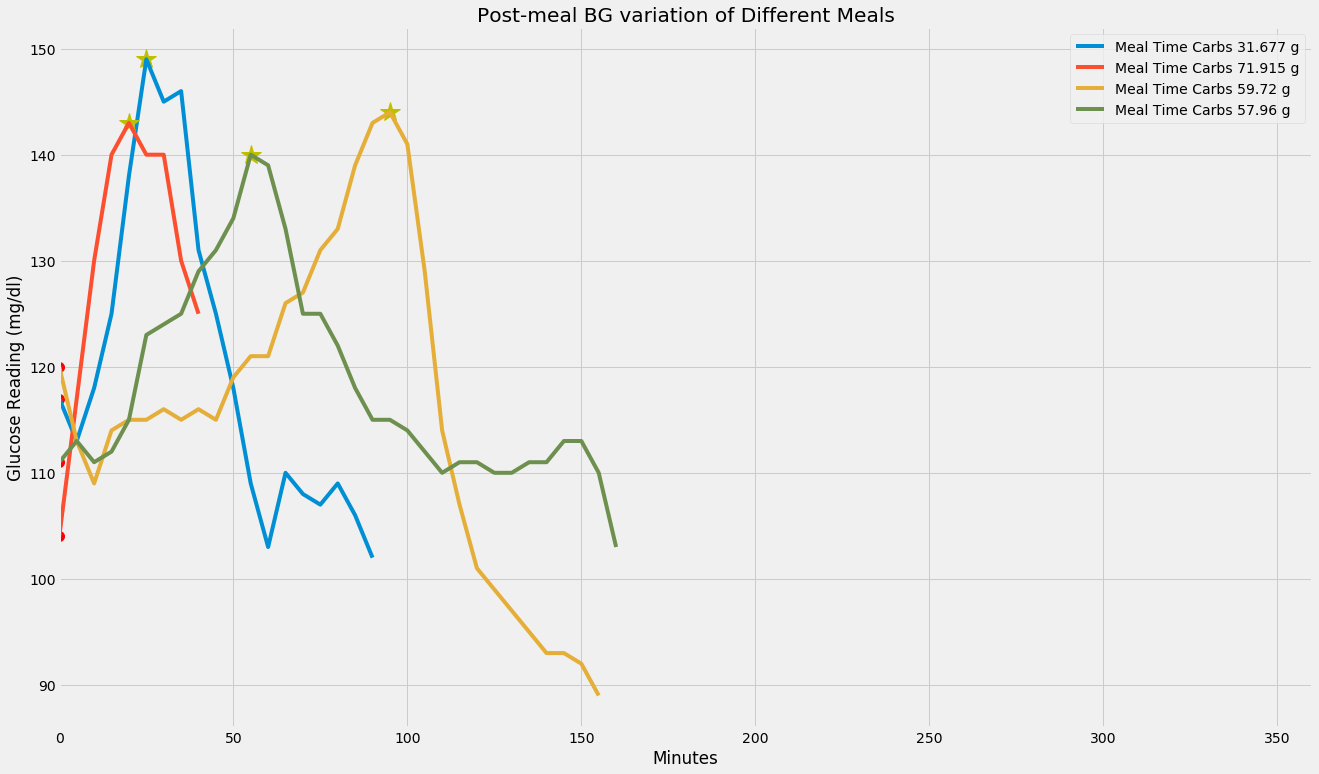

In [295]:
df_all_plots_v2 = pd.DataFrame(columns=Plot_window)

Plot_extraction_v2(df_P_meals_w_deletion_v2, df_all_plots_v2)
plotting(df_all_plots_v2, df_P_meals_w_deletion_v3)

#print_full(df_P1_meals_w_deletion)